In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline 

import sys
import os
import math

import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import healpy as hp
import pymaster as nmt
import pyccl as ccl

sys.path.append('..')
from env_config import DATA_PATH
from utils import get_config
from experiment import Experiment, show_mcmc_report
from plotting import plot_hetdex_image, plot_correlation, plot_correlation_matrix, my_mollview

In [3]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
sns.set(style='ticks')
pd.set_option('mode.chained_assignment', None)

# Likelihood inference

Mean acceptance fraction: 0.68801875


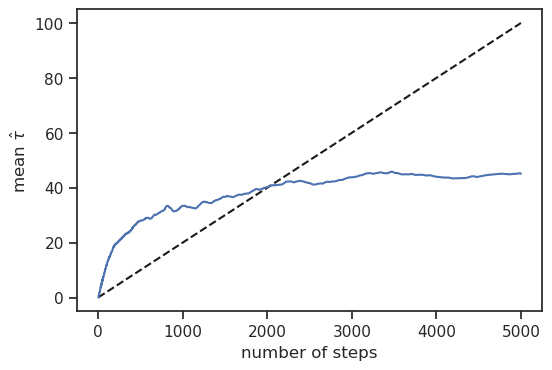

burn-in: 91
thin: 10
flat chain shape: (490, 32, 2)
flat log prob shape: (490, 32)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'stat_func'
  **contour_kws,
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/seaborn/dist

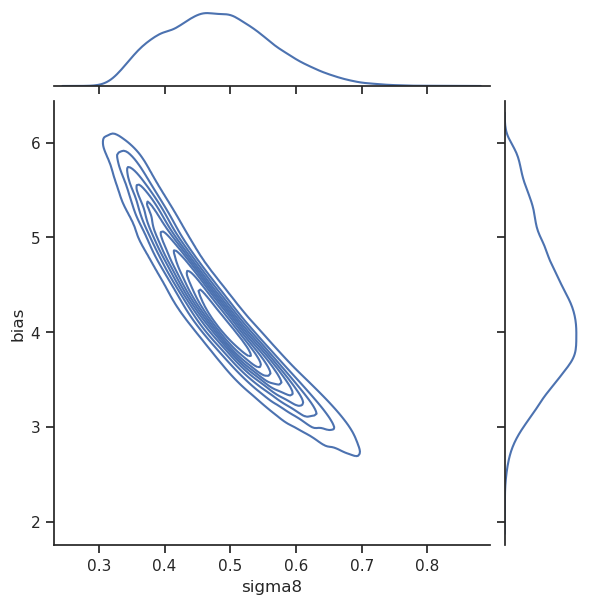

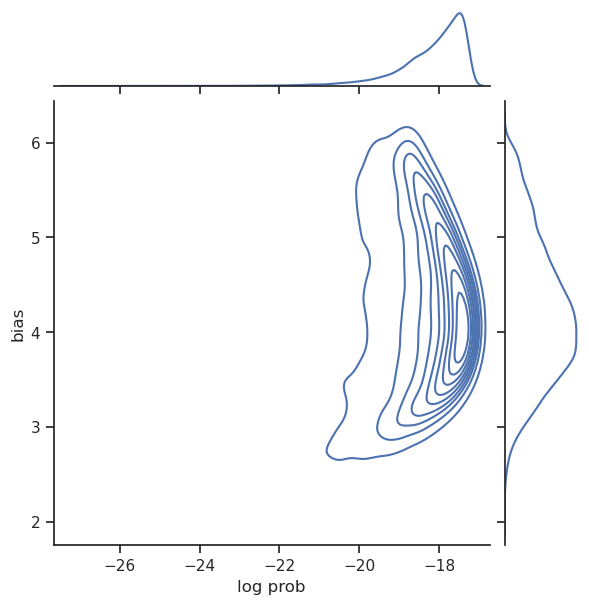

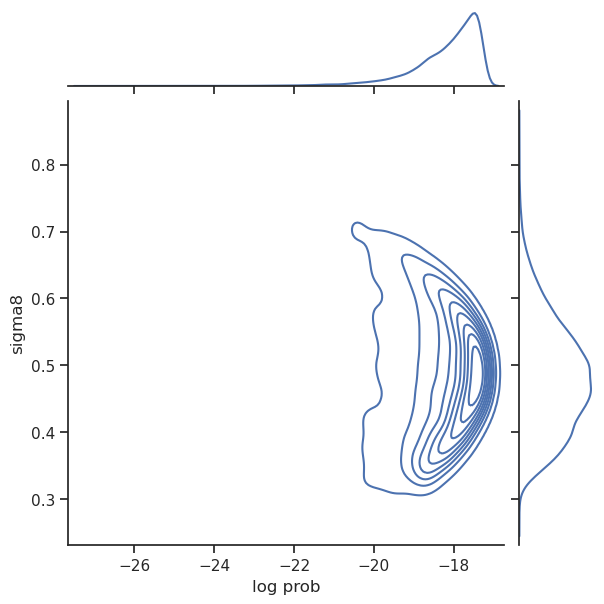

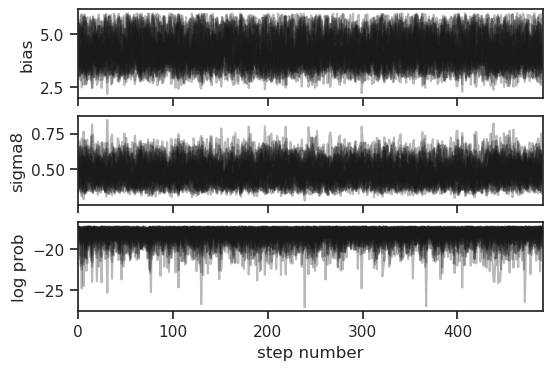

In [8]:
experiment_name = 'gg-gk__bias_sigma8__data-fixed_transposed'
show_mcmc_report(experiment_name, thin=10)

Mean acceptance fraction: 0.6869787172850159


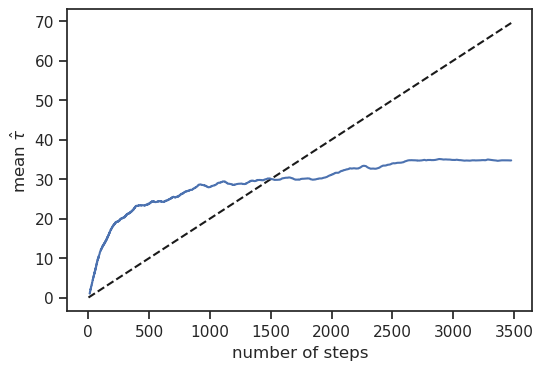

burn-in: 69
thin: 10
flat chain shape: (340, 32, 2)
flat log prob shape: (340, 32)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'stat_func'
  **contour_kws,
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/seaborn/dist

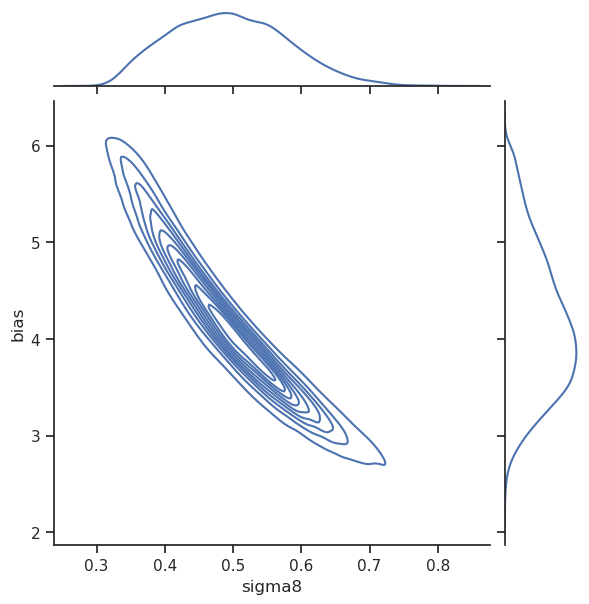

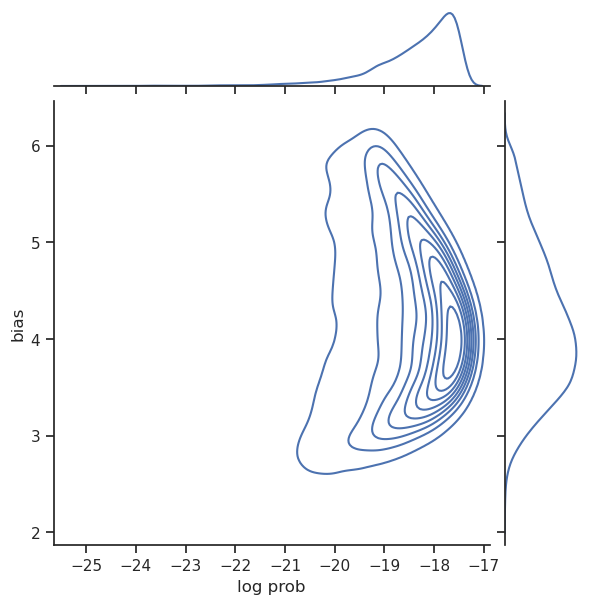

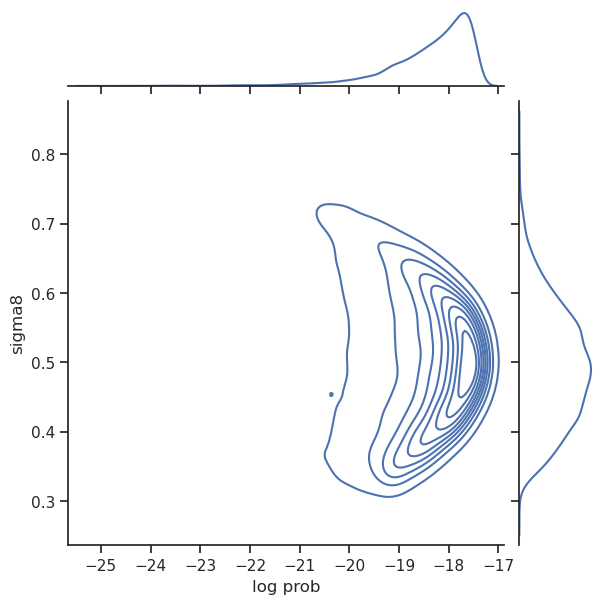

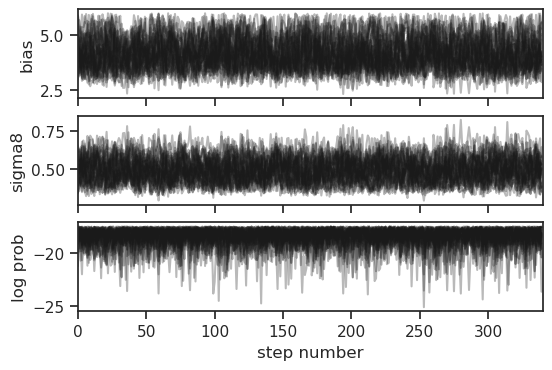

In [4]:
experiment_name = 'gg-gk__bias_sigma8__data-fixed'
show_mcmc_report(experiment_name, thin=10)

# Run experiment

In [4]:
config = get_config('LoTSS_DR1')
display(config)

{'lss_survey_name': 'LoTSS_DR1',
 'flux_min_cut': 2,
 'nside': 512,
 'z_tail': 2.0,
 'bias': 2.1,
 'scale_bias': True,
 'cosmology_name': 'planck',
 'cosmology_matter_power_spectrum': 'halofit',
 'correlation_symbols': ['gg', 'gk'],
 'l_max': {'gg': 510, 'gk': 510},
 'ells_per_bin': {'gg': 50, 'gk': 50},
 'starting_params': {'bias': [2.1, 0.5], 'sigma8': [0.83, 0.1]},
 'n_walkers': 32,
 'max_iterations': 5000,
 'continue_sampling': False}

In [5]:
experiment = Experiment(config, set_data=True, set_maps=True)

../data_lotss.py:149: TableReplaceWarning: converted column 'objID' from integer to float
  data = read_fits_to_pandas(data_paths[data_release])
../data_lotss.py:149: TableReplaceWarning: converted column 'nfilt_eazy' from integer to float
  data = read_fits_to_pandas(data_paths[data_release])
../data_lotss.py:149: TableReplaceWarning: converted column 'nfilt_atlas' from integer to float
  data = read_fits_to_pandas(data_paths[data_release])
../data_lotss.py:149: TableReplaceWarning: converted column 'nfilt_cosmos' from integer to float
  data = read_fits_to_pandas(data_paths[data_release])


Original LoTSS DR1 datashape: (318520, 143)
Total flux of S > 2 mJy: (57928, 143)


/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/fitsfunc.py:369: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 256
  warnings.warn("NSIDE = {0:d}".format(nside))
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format

In [6]:
experiment.set_correlations()

data correlations:   0%|          | 0/2 [00:00<?, ?it/s]

covariance matrices:   0%|          | 0/3 [00:00<?, ?it/s]

# Power spectra

In [7]:
experiment.print_correlation_statistics()

C_gg sigma: 34.14
C_gg chi squared: 17.89
C_gk sigma: 5.08
C_gk chi squared: 9.27


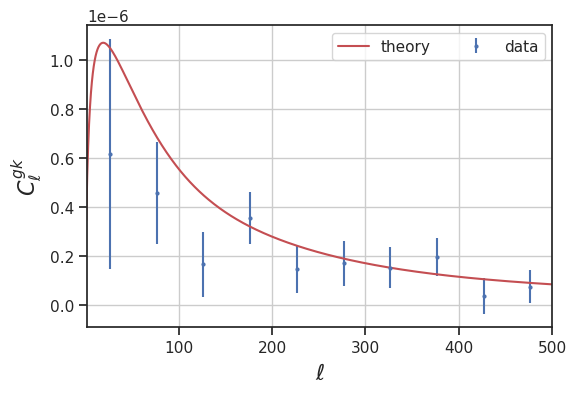

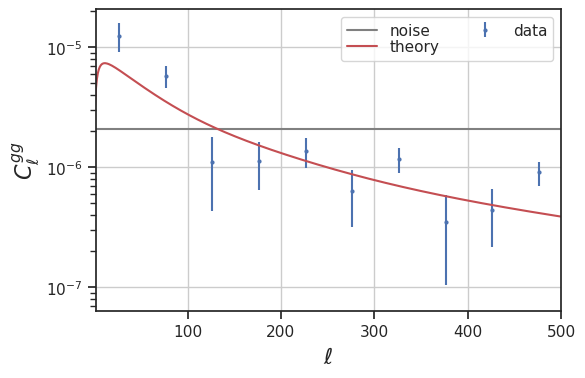

In [8]:
# Code
plot_correlation(experiment, 'gk', x_min=2, x_max=500, y_min=None, y_max=None, x_scale='linear', y_scale='linear')
plot_correlation(experiment, 'gg', x_min=2, x_max=500, y_min=None, y_max=None, x_scale='linear', y_scale='log')

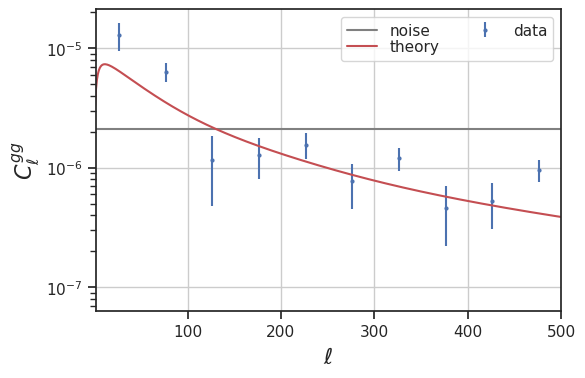

In [7]:
# Data product
plot_correlation(experiment, 'gg', x_min=2, x_max=500, y_min=None, y_max=None, x_scale='linear', y_scale='log')

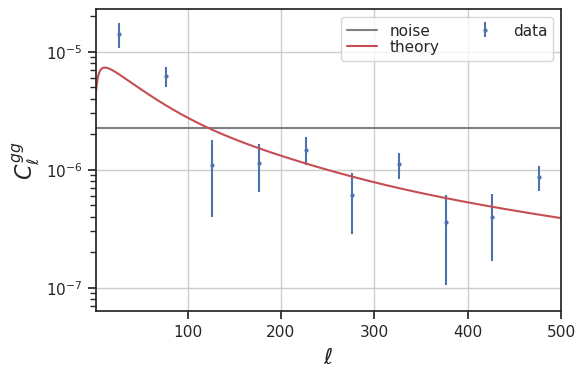

In [7]:
# No correction
plot_correlation(experiment, 'gg', x_min=2, x_max=500, y_min=None, y_max=None, x_scale='linear', y_scale='log')

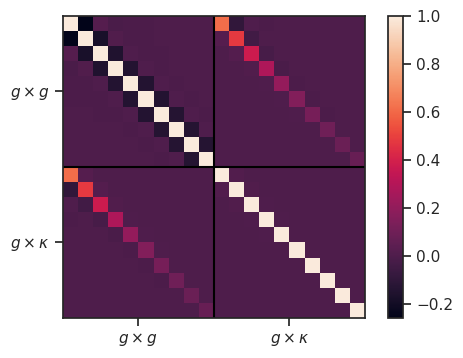

In [9]:
plot_correlation_matrix(experiment)

# Data

/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/sphtfunc.py:824: UserWarning: Sigma is 15.287792 arcmin (0.004447 rad) 
  sigma * 60 * 180 / np.pi, sigma
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/sphtfunc.py:829: UserWarning: -> fwhm is 36.000000 arcmin
  sigma * 60 * 180 / np.pi * (2.0 * np.sqrt(2.0 * np.log(2.0)))
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/sphtfunc.py:824: UserWarning: Sigma is 0.000000 arcmin (0.000000 rad) 
  sigma * 60 * 180 / np.pi, sigma
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/sphtfunc.py:829: UserWarning: -> fwhm is 0.000000 arcmin
  sigma * 60 * 180 / np.pi * (2.0 * np.sqrt(2.0 * np.log(2.0)))
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, y

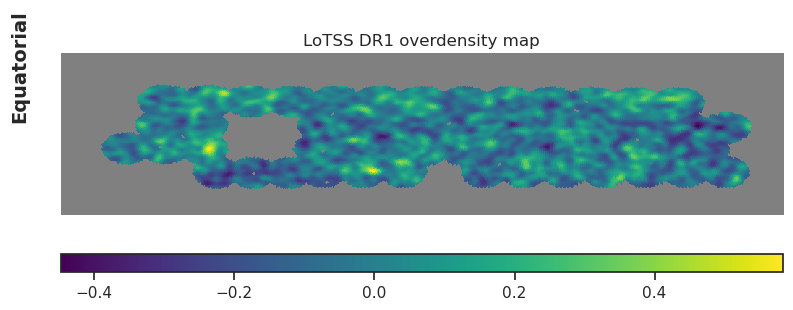

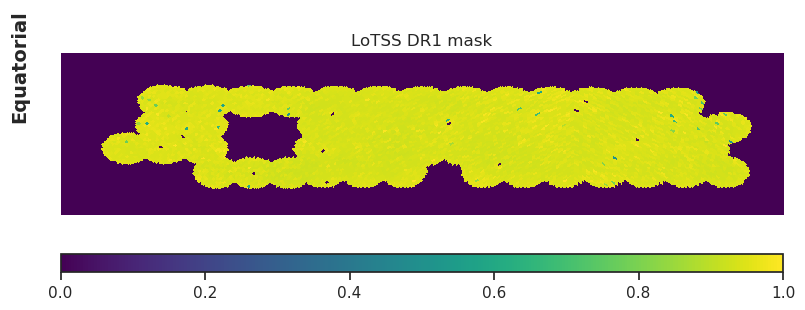

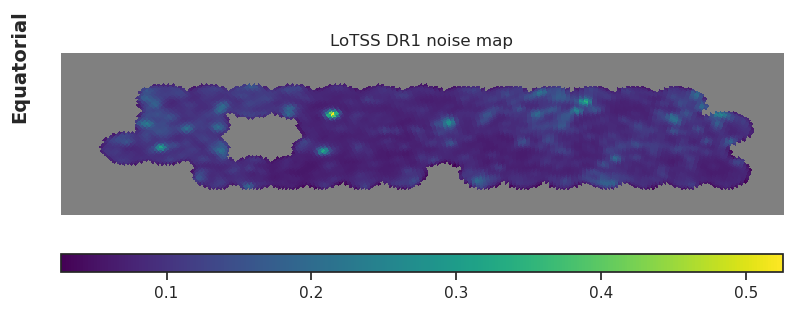

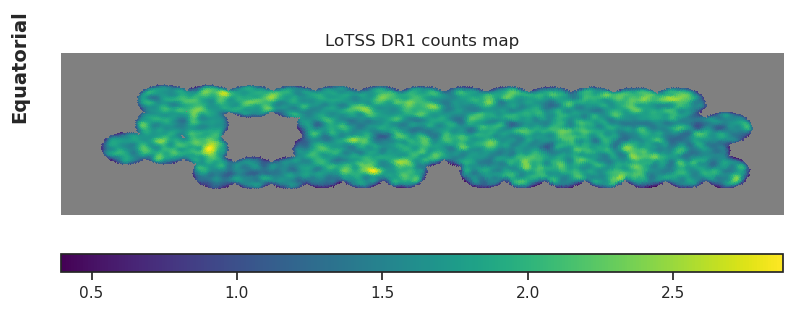

In [10]:
plot_hetdex_image(experiment.processed_maps['g'], title='LoTSS DR1 overdensity map', fwhm=math.radians(0.6))
plot_hetdex_image(experiment.masks['g'], title='LoTSS DR1 mask')
plot_hetdex_image(experiment.noise_maps['g'], title='LoTSS DR1 noise map', fwhm=math.radians(0.6))
plot_hetdex_image(experiment.base_maps['g'], title='LoTSS DR1 counts map', fwhm=math.radians(0.6))

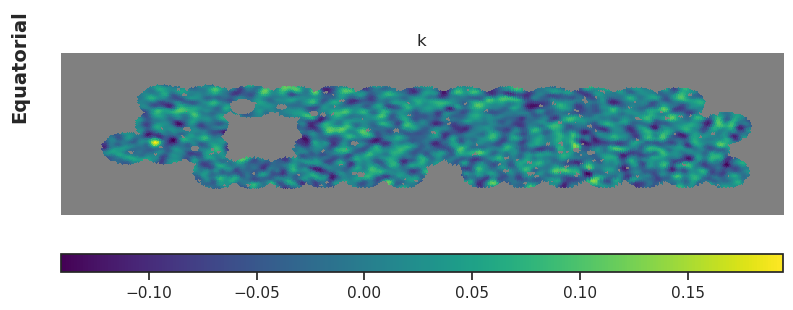

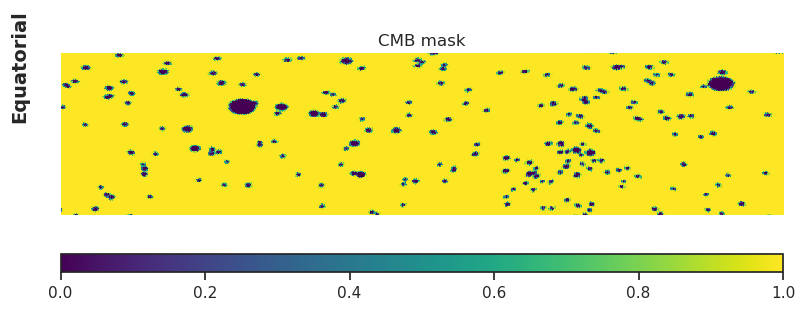

In [11]:
plot_hetdex_image(experiment.base_maps['k'], experiment.masks['g'], title='k', fwhm=math.radians(0.6))
plot_hetdex_image(experiment.masks['k'], title='CMB mask')